First importing all the required modules.

In [110]:

from pymongo import MongoClient
from requests.auth import HTTPProxyAuth
from nauk_page import get_data
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [111]:
# Getting the data from the database and the converting it into a dataframe is done here.
client = MongoClient()
db = client['jobs_database']
coll = db['naukri_jobs']
#coll.drop
print(coll.count())

cursor = coll.find()
df = pd.DataFrame(list(cursor))

184


In [112]:
print(df.head())

   Experience                                                Job   Location  \
0  5 - 10 yrs                Data Scientist / Predictive Analyst      Noida   
1   4 - 9 yrs                           Data Scientist (4-9 yrs)  Bengaluru   
2  8 - 10 yrs                                     Data Scientist  Bengaluru   
3  8 - 13 yrs                               Chief Data Scientist  Delhi NCR   
4   4 - 7 yrs  Data Scientist - Optimization Techniques & Ana...     Mumbai   

                                        Requirements  \
0  [machine learning, python, R programming, pred...   
1  [SQL, Statistical Modeling, SAS, Segmentation,...   
2  [Technical Support, Technical Design, Solution...   
3  [SQL, Machine Learning, Statistical Analysis, ...   
4  [Business Intelligence, Data Management, Data ...   

                         Salary                       _id  
0  Not Disclosed by Recruiter    58822a7426354e1471f6bba5  
1  Not Disclosed by Recruiter    58822a7526354e1471f6bba6  
2  Not D

# Now I will perform some cleanup of the data from the experience column

In [113]:
l = df['Experience']

In [114]:
import re
data_in_str = [re.sub("[^0-9-]","",p) for p in l] 

In [115]:
small_list = []
exp_list_cleaned = []

In [116]:
#Code for converting the expeirnce into numbers and storing them as intervals
for z in range(len(data_in_str)):
    k,j="",""
    i = 0
    small_list = []
    mark = 0
    while i<len(data_in_str[z]):
        while data_in_str[z][i]!='-' and mark==0:
            k = k+data_in_str[z][i]
            i = i+1
        mark = 1
        if(data_in_str[z][i]=='-'):
            i = i+1
            continue
        else:
            j = j+data_in_str[z][i]
            i = i+1
    k = int(k)
    j = int(j)
    small_list.append(k)
    small_list.append(j)
    exp_list_cleaned.append(small_list)    

In [117]:
print(len(exp_list_cleaned))
print(type(exp_list_cleaned))
print((exp_list_cleaned[0]))

184
<class 'list'>
[5, 10]


In [118]:
df['clean_exp'] = exp_list_cleaned

In [119]:
df['freq_exp'] = df.groupby('Experience')['Experience'].transform('count')

## We have exp_list_cleaned and also we have frequency. Now we will take averages. 

What I next do is take the average of all the experience and then group them into 0-2, 2-5, 5-8, 8-13 an >13. 

In [120]:
dic_exp = {}

In [121]:
for i in range(len(df)):
    tup = tuple(exp_list_cleaned[i])
    freq = df['freq_exp'][i]
    dic_exp.update({tup:freq})

In [122]:
print(len(dic_exp))
print(dic_exp)

36
{(11, 16): 2, (5, 9): 2, (4, 7): 4, (1, 3): 4, (8, 13): 10, (7, 10): 2, (4, 8): 4, (7, 12): 4, (1, 4): 2, (10, 12): 2, (2, 6): 4, (2, 3): 4, (3, 7): 2, (5, 10): 18, (2, 5): 14, (0, 3): 2, (5, 8): 10, (3, 5): 8, (2, 7): 10, (4, 9): 6, (6, 8): 2, (8, 12): 2, (10, 16): 2, (6, 10): 2, (5, 7): 4, (8, 10): 4, (1, 6): 2, (10, 18): 2, (3, 8): 14, (6, 11): 10, (3, 6): 4, (4, 5): 2, (1, 5): 6, (13, 20): 2, (3, 4): 2, (2, 4): 10}


In [123]:
print(dic_exp.keys())
list_keys = list(dic_exp.keys())

dict_keys([(11, 16), (5, 9), (4, 7), (1, 3), (8, 13), (7, 10), (4, 8), (7, 12), (1, 4), (10, 12), (2, 6), (2, 3), (3, 7), (5, 10), (2, 5), (0, 3), (5, 8), (3, 5), (2, 7), (4, 9), (6, 8), (8, 12), (10, 16), (6, 10), (5, 7), (8, 10), (1, 6), (10, 18), (3, 8), (6, 11), (3, 6), (4, 5), (1, 5), (13, 20), (3, 4), (2, 4)])


In [124]:
list_freq = list(dic_exp.values())


In [125]:
avg = [int((l[0]+l[1])/2) for l in list_keys]


In [126]:
#0-2, 2-5, 5-8, 8-13, 13-20
#The above are the ranges in which the groups will be divided.

range1 , range2, range3, range4, range5 = 0, 0, 0, 0, 0
for i in range(len(avg)):
    if avg[i]>=0 and avg[i]<=2:
        range1 = range1 + list_freq[i]
    if avg[i]>=2 and avg[i]<=5:
        range2 = range2 + list_freq[i]
    if avg[i]>=5 and avg[i]<=8:
        range3 = range3 + list_freq[i]
    if avg[i]>=8 and avg[i]<=13:
        range4 = range4 + list_freq[i]
    if avg[i]>=13:
        range5 = range5 + list_freq[i]
        
print(range1, range2, range3, range4, range5)

12 92 80 40 8


In [127]:
y_exp = []
y_exp.append(range1), y_exp.append(range2), y_exp.append(range3), y_exp.append(range4)
y_exp.append(range5)

In [128]:
name_list = ["0-2","2-5","5-8","8-13",">13"]
p = [i for i in range(len(y_exp))]

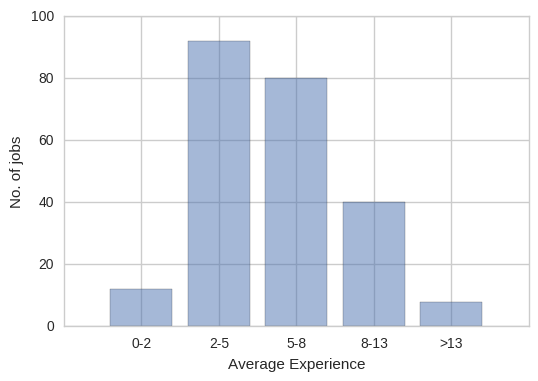

In [129]:
import matplotlib.pyplot as plt
x = plt.bar(p, y_exp, align='center', alpha = 0.5)
plt.xticks(p, name_list)
plt.xlabel('Average Experience')
plt.ylabel('No. of jobs')
plt.show()

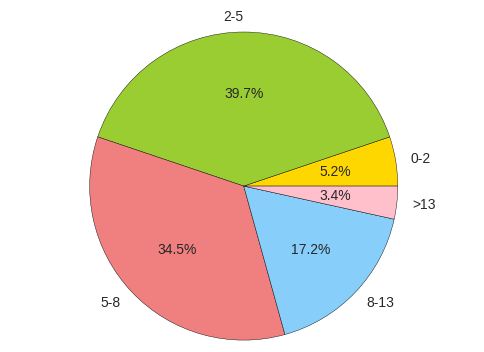

In [28]:
#Below is the code for creating the bar chart of the data according to experience
#labels = name_list
#sizes = y_exp
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']
plt.pie(y_exp, labels=name_list, colors=colors,  autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [29]:
df.head()

,Experience,Job,Location,Requirements,Salary,_id,clean_exp,freq_exp
0,5 - 10 yrs,Data Scientist / Predictive Analyst,Noida,"[machine learning, python, R programming, pred...",Not Disclosed by Recruiter,58822a7426354e1471f6bba5,"[5, 10]",18
1,4 - 9 yrs,Data Scientist (4-9 yrs),Bengaluru,"[SQL, Statistical Modeling, SAS, Segmentation,...",Not Disclosed by Recruiter,58822a7526354e1471f6bba6,"[4, 9]",6
2,8 - 10 yrs,Data Scientist,Bengaluru,"[Technical Support, Technical Design, Solution...",Not Disclosed by Recruiter,58822a7526354e1471f6bba7,"[8, 10]",4
3,8 - 13 yrs,Chief Data Scientist,Delhi NCR,"[SQL, Machine Learning, Statistical Analysis, ...",Not Disclosed by Recruiter,58822a7526354e1471f6bba8,"[8, 13]",10
4,4 - 7 yrs,Data Scientist - Optimization Techniques & Ana...,Mumbai,"[Business Intelligence, Data Management, Data ...",Not Disclosed by Recruiter,58822a7526354e1471f6bba9,"[4, 7]",4


In [30]:
del df['freq_exp']
del df['clean_exp']

In [31]:
df.head()

,Experience,Job,Location,Requirements,Salary,_id
0,5 - 10 yrs,Data Scientist / Predictive Analyst,Noida,"[machine learning, python, R programming, pred...",Not Disclosed by Recruiter,58822a7426354e1471f6bba5
1,4 - 9 yrs,Data Scientist (4-9 yrs),Bengaluru,"[SQL, Statistical Modeling, SAS, Segmentation,...",Not Disclosed by Recruiter,58822a7526354e1471f6bba6
2,8 - 10 yrs,Data Scientist,Bengaluru,"[Technical Support, Technical Design, Solution...",Not Disclosed by Recruiter,58822a7526354e1471f6bba7
3,8 - 13 yrs,Chief Data Scientist,Delhi NCR,"[SQL, Machine Learning, Statistical Analysis, ...",Not Disclosed by Recruiter,58822a7526354e1471f6bba8
4,4 - 7 yrs,Data Scientist - Optimization Techniques & Ana...,Mumbai,"[Business Intelligence, Data Management, Data ...",Not Disclosed by Recruiter,58822a7526354e1471f6bba9


# Now the analysis based on location will be done. We will not do analysis based on salary because most of the fields in it are null.

In [34]:
loc_list_new = list(dick_location.keys())
loc_freq_new = list(dick_location.values())

Now I will just show the top 8 cities in the plot whihc have the most jobs.
So for that first I will sort the dictionary accorsing to the value and then take top 8 amd then plot them.

In [96]:
import operator
sorted_dick = sorted(dick_location.items(), key = operator.itemgetter(1), reverse=True)

In [97]:
def get_top_n(sorted_dictionary, n, list_key, list_val):
    for i in range(n):
        list_key.append(sorted_dictionary[i][0])
    for i in range(n):
        list_val.append(sorted_dictionary[i][1])
    return list_key, list_val

In [98]:
list_key = []
list_val = []
loc_key, loc_val = get_top_n(sorted_dick, 8, list_key, list_val)

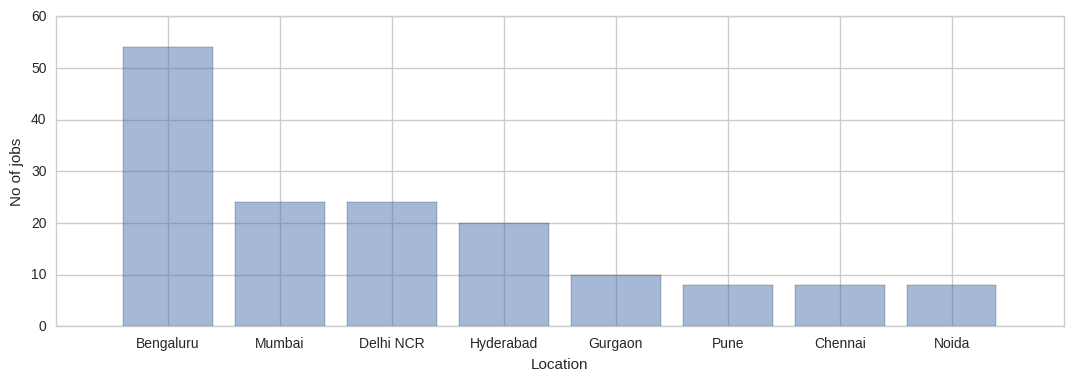

In [108]:
plt.figure(figsize = (13,4))
p = [i for i in range(len(loc_key))]
x = plt.bar(p, loc_val, align='center', alpha = 0.5)
plt.xticks(p, loc_key)
plt.xlabel('Location')
plt.ylabel('No of jobs')
plt.show()

# Now I will find what are the most frequent requirements in this job and perform some analysis on it.



Default dict data structure is used here. It is basically used to count the frequencies of items.
I will use this to count the frequencies of the requiremsnts

In [103]:
x = list(df['Requirements'])
from collections import defaultdict
dic = defaultdict(int)

for i in range(len(x)):
    for req in x[i]:
        dic[req] += 1

In [104]:
req_sorted = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)

In [105]:
key_req = []
val_req = []

key_req, val_req = get_top_n(req_sorted, 10, key_req, val_req)

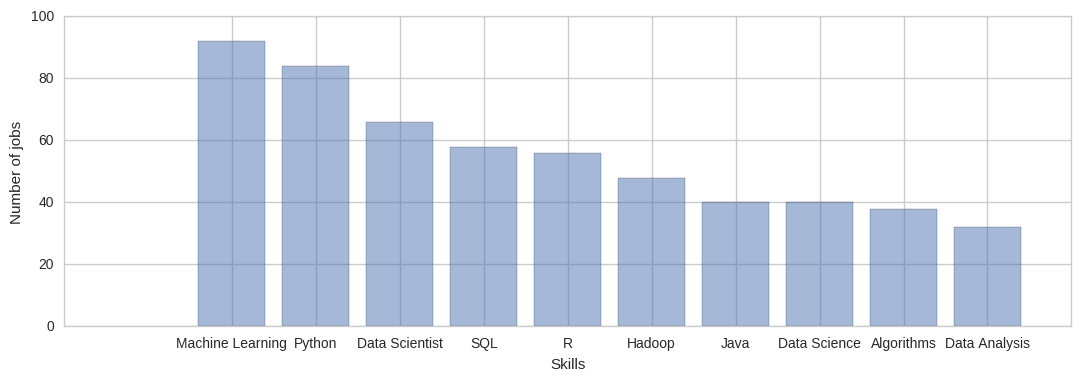

In [107]:
plt.figure(figsize = (13,4))
p = [i for i in range(len(key_req))]
x = plt.bar(p, val_req, align = 'center' , alpha = 0.5)
plt.xticks(p, key_req)
plt.xlabel('Skills')
plt.ylabel('Number of jobs')
plt.show()